# IPython 与 RQAlpha

## 加载 RQAlpha magic

In [1]:
%load_ext rqalpha

## 查看 RQAlpha magic 帮助

我们可以通过 `%%rqalpha` 直接在 `cell` 中运行回测代码。 `%%rqalpha` 后面的参数等价于在 CLI 中后面的 `rqalpha run` 的参数

In [2]:
%%rqalpha -h
""

Usage: ipykernel_launcher.py [OPTIONS]

  Start to run a strategy

Options:
  -h, --help                      Show this message and exit.
  -d, --data-bundle-path PATH
  -f, --strategy-file PATH
  -s, --start-date DATE
  -e, --end-date DATE
  -bm, --benchmark TEXT
  -mm, --margin-multiplier FLOAT
  -a, --account TEXT...           set account type with starting cash
  --position TEXT                 set init position
  -fq, --frequency [1d|1m|tick]
  -rt, --run-type [b|p|r]
  -rp, --round-price
  --resume
  --source-code TEXT
  -l, --log-level [verbose|debug|info|error|none]
  --disable-user-system-log       disable user system log stdout
  --disable-user-log              disable user log stdout
  --logger TEXT...                config logger, e.g. --logger system_log
                                  debug
  --locale [cn|en]
  --extra-vars TEXT               override context vars
  --enable-profiler               add line profiler to profile your strategy
  --config TEXT               

## 使用 %%rqalpha 进行回测

In [3]:
%%rqalpha -s 20100101 -e 20170505 -p -bm 000001.XSHG --account stock 100000

def init(context):
    context.stocks = ['000300.XSHG', '000905.XSHG', '000012.XSHG']

    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')
    
    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]
    
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)
        #logger.info("positions hs300: " + str(hsQuality) + ", zz500: " + str(zzQuality) + ", gz: " + str(gzQuality))

2010-01-04 WARN 订单创建失败: 可用资金不足。当前资金: 100000.00，000012.XSHG 下单所需资金: 100031.74。
2010-01-08 WARN 订单创建失败: 下单量为 0
2010-01-12 WARN 订单创建失败: 下单量为 0
2010-01-13 WARN 订单创建失败: 下单量为 0
2010-01-14 WARN 订单创建失败: 下单量为 0
2010-01-15 WARN 订单创建失败: 下单量为 0
2010-01-18 WARN 订单创建失败: 下单量为 0
2010-01-19 WARN 订单创建失败: 下单量为 0
2010-01-20 WARN 订单创建失败: 下单量为 0
2010-01-21 WARN 订单创建失败: 下单量为 0
2010-01-22 WARN 订单创建失败: 下单量为 0
2010-01-25 WARN 订单创建失败: 下单量为 0
2010-01-26 WARN 订单创建失败: 可用资金不足。当前资金: 92307.08，000012.XSHG 下单所需资金: 92308.76。
2010-01-27 WARN 订单创建失败: 可用资金不足。当前资金: 92307.08，000012.XSHG 下单所需资金: 92346.44。
2010-01-28 WARN 订单创建失败: 可用资金不足。当前资金: 92307.08，000012.XSHG 下单所需资金: 92314.11。
2010-02-01 WARN 订单创建失败: 下单量为 0
2010-02-02 WARN 订单创建失败: 下单量为 0
2010-02-03 WARN 订单创建失败: 下单量为 0
2010-02-04 WARN 订单创建失败: 下单量为 0
2010-02-05 WARN 订单创建失败: 下单量为 0
2010-02-08 WARN 订单创建失败: 下单量为 0
2010-02-09 WARN 订单创建失败: 下单量为 0
2010-02-10 WARN 订单创建失败: 下单量为 0
2010-02-11 WARN 订单创建失败: 下单量为 0
2010-02-12 WARN 订单创建失败: 下单量为 0
2010-02-22 WARN 订单创建失败: 下单量为 0
2010-02-23 W

2011-01-20 WARN 订单创建失败: 下单量为 0
2011-01-21 WARN 订单创建失败: 下单量为 0
2011-01-24 WARN 订单创建失败: 下单量为 0
2011-01-25 WARN 订单创建失败: 下单量为 0
2011-01-26 WARN 订单创建失败: 下单量为 0
2011-01-27 WARN 订单创建失败: 下单量为 0
2011-01-28 WARN 订单创建失败: 下单量为 0
2011-01-31 WARN 订单创建失败: 下单量为 0
2011-02-01 WARN 订单创建失败: 下单量为 0
2011-02-09 WARN 订单创建失败: 下单量为 0
2011-02-10 WARN 订单创建失败: 下单量为 0
2011-02-14 WARN 订单创建失败: 下单量为 0
2011-02-15 WARN 订单创建失败: 下单量为 0
2011-02-17 WARN 订单创建失败: 下单量为 0
2011-02-18 WARN 订单创建失败: 下单量为 0
2011-02-21 WARN 订单创建失败: 下单量为 0
2011-02-22 WARN 订单创建失败: 下单量为 0
2011-02-23 WARN 订单创建失败: 下单量为 0
2011-02-24 WARN 订单创建失败: 下单量为 0
2011-02-25 WARN 订单创建失败: 下单量为 0
2011-02-28 WARN 订单创建失败: 下单量为 0
2011-03-01 WARN 订单创建失败: 下单量为 0
2011-03-02 WARN 订单创建失败: 下单量为 0
2011-03-03 WARN 订单创建失败: 下单量为 0
2011-03-04 WARN 订单创建失败: 下单量为 0
2011-03-07 WARN 订单创建失败: 下单量为 0
2011-03-08 WARN 订单创建失败: 下单量为 0
2011-03-09 WARN 订单创建失败: 下单量为 0
2011-03-10 WARN 订单创建失败: 下单量为 0
2011-03-11 WARN 订单创建失败: 下单量为 0
2011-03-14 WARN 订单创建失败: 下单量为 0
2011-03-15 WARN 订单创建失败: 下单量为 0
2011-03-

2012-02-22 WARN 订单创建失败: 下单量为 0
2012-02-23 WARN 订单创建失败: 下单量为 0
2012-02-24 WARN 订单创建失败: 下单量为 0
2012-02-27 WARN 订单创建失败: 下单量为 0
2012-02-28 WARN 订单创建失败: 下单量为 0
2012-02-29 WARN 订单创建失败: 下单量为 0
2012-03-01 WARN 订单创建失败: 下单量为 0
2012-03-02 WARN 订单创建失败: 下单量为 0
2012-03-05 WARN 订单创建失败: 下单量为 0
2012-03-06 WARN 订单创建失败: 下单量为 0
2012-03-07 WARN 订单创建失败: 下单量为 0
2012-03-08 WARN 订单创建失败: 下单量为 0
2012-03-09 WARN 订单创建失败: 下单量为 0
2012-03-12 WARN 订单创建失败: 下单量为 0
2012-03-13 WARN 订单创建失败: 下单量为 0
2012-03-14 WARN 订单创建失败: 下单量为 0
2012-03-15 WARN 订单创建失败: 下单量为 0
2012-03-16 WARN 订单创建失败: 下单量为 0
2012-03-19 WARN 订单创建失败: 下单量为 0
2012-03-20 WARN 订单创建失败: 下单量为 0
2012-03-21 WARN 订单创建失败: 下单量为 0
2012-03-22 WARN 订单创建失败: 可用资金不足。当前资金: 116119.28，000012.XSHG 下单所需资金: 116128.70。
2012-03-23 WARN 订单创建失败: 可用资金不足。当前资金: 116119.28，000012.XSHG 下单所需资金: 116146.25。
2012-03-26 WARN 订单创建失败: 可用资金不足。当前资金: 116119.28，000012.XSHG 下单所需资金: 116190.14。
2012-03-27 WARN 订单创建失败: 可用资金不足。当前资金: 116119.28，000012.XSHG 下单所需资金: 116190.14。
2012-03-28 WARN 订单创建失败: 可用资金不足。当前资金: 

2013-03-14 WARN 订单创建失败: 可用资金不足。当前资金: 121060.84，000012.XSHG 下单所需资金: 121147.14。
2013-03-15 WARN 订单创建失败: 可用资金不足。当前资金: 121060.84，000012.XSHG 下单所需资金: 121156.00。
2013-03-19 WARN 订单创建失败: 下单量为 0
2013-03-20 WARN 订单创建失败: 下单量为 0
2013-03-22 WARN 订单创建失败: 下单量为 0
2013-03-25 WARN 订单创建失败: 下单量为 0
2013-03-27 WARN 订单创建失败: 可用资金不足。当前资金: 118974.77，000012.XSHG 下单所需资金: 119009.09。
2013-03-29 WARN 订单创建失败: 下单量为 0
2013-04-01 WARN 订单创建失败: 下单量为 0
2013-04-02 WARN 订单创建失败: 下单量为 0
2013-04-03 WARN 订单创建失败: 下单量为 0
2013-04-08 WARN 订单创建失败: 下单量为 0
2013-04-09 WARN 订单创建失败: 下单量为 0
2013-04-10 WARN 订单创建失败: 下单量为 0
2013-04-11 WARN 订单创建失败: 下单量为 0
2013-04-12 WARN 订单创建失败: 下单量为 0
2013-04-15 WARN 订单创建失败: 下单量为 0
2013-04-16 WARN 订单创建失败: 下单量为 0
2013-04-17 WARN 订单创建失败: 下单量为 0
2013-04-18 WARN 订单创建失败: 下单量为 0
2013-04-19 WARN 订单创建失败: 下单量为 0
2013-04-22 WARN 订单创建失败: 下单量为 0
2013-04-23 WARN 订单创建失败: 下单量为 0
2013-04-24 WARN 订单创建失败: 下单量为 0
2013-04-25 WARN 订单创建失败: 下单量为 0
2013-04-26 WARN 订单创建失败: 下单量为 0
2013-05-02 WARN 订单创建失败: 下单量为 0
2013-05-03 WARN 订单创建失败

2014-04-25 WARN 订单创建失败: 下单量为 0
2014-04-28 WARN 订单创建失败: 可用资金不足。当前资金: 115265.74，000012.XSHG 下单所需资金: 115341.88。
2014-04-30 WARN 订单创建失败: 下单量为 0
2014-05-05 WARN 订单创建失败: 下单量为 0
2014-05-06 WARN 订单创建失败: 下单量为 0
2014-05-07 WARN 订单创建失败: 下单量为 0
2014-05-08 WARN 订单创建失败: 下单量为 0
2014-05-09 WARN 订单创建失败: 下单量为 0
2014-05-12 WARN 订单创建失败: 下单量为 0
2014-05-13 WARN 订单创建失败: 下单量为 0
2014-05-14 WARN 订单创建失败: 下单量为 0
2014-05-15 WARN 订单创建失败: 下单量为 0
2014-05-16 WARN 订单创建失败: 下单量为 0
2014-05-19 WARN 订单创建失败: 下单量为 0
2014-05-20 WARN 订单创建失败: 下单量为 0
2014-05-21 WARN 订单创建失败: 下单量为 0
2014-05-22 WARN 订单创建失败: 下单量为 0
2014-05-23 WARN 订单创建失败: 下单量为 0
2014-05-27 WARN 订单创建失败: 下单量为 0
2014-05-28 WARN 订单创建失败: 下单量为 0
2014-05-29 WARN 订单创建失败: 下单量为 0
2014-05-30 WARN 订单创建失败: 下单量为 0
2014-06-03 WARN 订单创建失败: 下单量为 0
2014-06-04 WARN 订单创建失败: 下单量为 0
2014-06-05 WARN 订单创建失败: 下单量为 0
2014-06-06 WARN 订单创建失败: 下单量为 0
2014-06-09 WARN 订单创建失败: 可用资金不足。当前资金: 114503.50，000012.XSHG 下单所需资金: 114536.68。
2014-06-11 WARN 订单创建失败: 下单量为 0
2014-06-12 WARN 订单创建失败: 下单量为 0
2014-06

2015-06-10 WARN 订单创建失败: 下单量为 0
2015-06-11 WARN 订单创建失败: 下单量为 0
2015-06-12 WARN 订单创建失败: 下单量为 0
2015-06-15 WARN 订单创建失败: 下单量为 0
2015-06-16 WARN 订单创建失败: 下单量为 0
2015-06-17 WARN 订单创建失败: 下单量为 0
2015-06-18 WARN 订单创建失败: 下单量为 0
2015-06-19 WARN 订单创建失败: 可用资金不足。当前资金: 326520.47，000012.XSHG 下单所需资金: 326634.55。
2015-06-23 WARN 订单创建失败: 可用资金不足。当前资金: 326520.47，000012.XSHG 下单所需资金: 326703.63。
2015-06-24 WARN 订单创建失败: 可用资金不足。当前资金: 326520.47，000012.XSHG 下单所需资金: 326659.92。
2015-06-26 WARN 订单创建失败: 可用资金不足。当前资金: 299537.19，000012.XSHG 下单所需资金: 299718.76。
2015-06-29 WARN 订单创建失败: 可用资金不足。当前资金: 299537.19，000012.XSHG 下单所需资金: 299649.16。
2015-06-30 WARN 订单创建失败: 可用资金不足。当前资金: 299537.19，000012.XSHG 下单所需资金: 299669.18。
2015-07-01 WARN 订单创建失败: 可用资金不足。当前资金: 299537.19，000012.XSHG 下单所需资金: 299678.69。
2015-07-02 WARN 订单创建失败: 可用资金不足。当前资金: 299537.19，000012.XSHG 下单所需资金: 299629.13。
2015-07-03 WARN 订单创建失败: 可用资金不足。当前资金: 299537.19，000012.XSHG 下单所需资金: 299649.16。
2015-07-06 WARN 订单创建失败: 可用资金不足。当前资金: 299537.19，000012.XSHG 下单所需资金: 299679.55。
201

2016-01-26 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308107.04。
2016-01-27 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308143.28。
2016-01-28 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308047.50。
2016-01-29 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308163.13。
2016-02-01 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308050.84。
2016-02-02 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308146.73。
2016-02-03 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308126.88。
2016-02-04 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308070.68。
2016-02-05 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308110.35。
2016-02-15 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308059.91。
2016-02-16 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308059.91。
2016-02-17 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308059.91。
2016-02-19 WARN 订单创建失败: 下单量为 0
2016-02-22 WARN 订单创建失败: 可用资金不足。当前

2016-10-17 WARN 订单创建失败: 可用资金不足。当前资金: 291195.84，000012.XSHG 下单所需资金: 291276.45。
2016-10-19 WARN 订单创建失败: 下单量为 0
2016-10-20 WARN 订单创建失败: 下单量为 0
2016-10-21 WARN 订单创建失败: 下单量为 0
2016-10-24 WARN 订单创建失败: 下单量为 0
2016-10-25 WARN 订单创建失败: 下单量为 0
2016-10-26 WARN 订单创建失败: 下单量为 0
2016-10-27 WARN 订单创建失败: 下单量为 0
2016-10-28 WARN 订单创建失败: 下单量为 0
2016-10-31 WARN 订单创建失败: 下单量为 0
2016-11-01 WARN 订单创建失败: 下单量为 0
2016-11-02 WARN 订单创建失败: 下单量为 0
2016-11-03 WARN 订单创建失败: 下单量为 0
2016-11-04 WARN 订单创建失败: 可用资金不足。当前资金: 288684.87，000300.XSHG 下单所需资金: 288689.39。
2016-11-07 WARN 订单创建失败: 可用资金不足。当前资金: 288684.87，000300.XSHG 下单所需资金: 288897.67。
2016-11-09 WARN 订单创建失败: 下单量为 0
2016-11-10 WARN 订单创建失败: 下单量为 0
2016-11-16 WARN 订单创建失败: 下单量为 0
2016-11-17 WARN 订单创建失败: 下单量为 0
2016-11-18 WARN 订单创建失败: 下单量为 0
2016-11-24 WARN 订单创建失败: 可用资金不足。当前资金: 291583.14，000905.XSHG 下单所需资金: 291647.33。
2016-11-29 WARN 订单创建失败: 下单量为 0
2016-11-30 WARN 订单创建失败: 下单量为 0
2016-12-01 WARN 订单创建失败: 下单量为 0
2016-12-02 WARN 订单创建失败: 下单量为 0
2016-12-05 WARN 订单创建失败: 下单量为 0
2016-1

<Figure size 1800x600 with 3 Axes>

## 获取回测报告

运行完回测后，报告会自动存储到 `report` 变量中。可以直接通过 `report` 变量获取当次回测的结果。

另外 rqalpha 的 mod 的输出会自动存储在 `results` 变量中。

In [4]:
results.keys()

dict_keys(['sys_analyser'])

In [5]:
report.keys()

dict_keys(['stock_positions', 'stock_account', 'portfolio', 'benchmark_portfolio', 'summary', 'trades'])

In [6]:
report.trades[:5]

,commission,exec_id,last_price,last_quantity,order_book_id,order_id,position_effect,side,symbol,tax,trading_datetime,transaction_cost
datetime,,,,,,,,,,,,
2010-01-05 15:00:00,79.922208,15349094850000,122.28,817,000012.XSHG,15349094720001,OPEN,BUY,国债指数,0,2010-01-05 15:00:00,79.922208
2010-01-06 15:00:00,79.948352,15349094850001,122.32,817,000012.XSHG,15349094720002,CLOSE,SELL,国债指数,0,2010-01-06 15:00:00,79.948352
2010-01-06 15:00:00,76.444704,15349094850002,4550.28,21,000905.XSHG,15349094720003,OPEN,BUY,中证500,0,2010-01-06 15:00:00,76.444704
2010-01-07 15:00:00,74.913888,15349094850003,4459.16,21,000905.XSHG,15349094720004,CLOSE,SELL,中证500,0,2010-01-07 15:00:00,74.913888
2010-01-07 15:00:00,78.180552,15349094850004,122.31,799,000012.XSHG,15349094720005,OPEN,BUY,国债指数,0,2010-01-07 15:00:00,78.180552


In [7]:
report.portfolio[:5]

,cash,market_value,static_unit_net_value,total_value,unit_net_value,units
date,,,,,,
2010-01-04,-31.741,99951.78,1.000,99920.039,0.999200,100000.0
2010-01-05,-31.741,99902.76,0.999,99871.019,0.998710,100000.0
2010-01-06,4191.426,95555.88,0.999,99747.306,0.997473,100000.0
2010-01-07,-44.999,97725.69,0.997,97680.691,0.976807,100000.0
2010-01-08,-44.999,97733.68,0.977,97688.681,0.976887,100000.0


In [8]:
report.stock_positions[:5]

,avg_price,last_price,market_value,order_book_id,quantity,symbol
date,,,,,,
2010-01-04,122.34,122.34,99951.78,000012.XSHG,817,国债指数
2010-01-05,122.34,122.28,99902.76,000012.XSHG,817,国债指数
2010-01-06,122.34,122.32,0.00,000012.XSHG,0,国债指数
2010-01-06,4550.28,4550.28,95555.88,000905.XSHG,21,中证500(沪)
2010-01-07,4550.28,4459.16,0.00,000905.XSHG,0,中证500(沪)


## 使用 run_func 运行回测

2010-01-04 WARN 订单创建失败: 可用资金不足。当前资金: 100000.00，000012.XSHG 下单所需资金: 100031.74。
2010-01-08 WARN 订单创建失败: 下单量为 0
2010-01-12 WARN 订单创建失败: 下单量为 0
2010-01-13 WARN 订单创建失败: 下单量为 0
2010-01-14 WARN 订单创建失败: 下单量为 0
2010-01-15 WARN 订单创建失败: 下单量为 0
2010-01-18 WARN 订单创建失败: 下单量为 0
2010-01-19 WARN 订单创建失败: 下单量为 0
2010-01-20 WARN 订单创建失败: 下单量为 0
2010-01-21 WARN 订单创建失败: 下单量为 0
2010-01-22 WARN 订单创建失败: 下单量为 0
2010-01-25 WARN 订单创建失败: 下单量为 0
2010-01-26 WARN 订单创建失败: 可用资金不足。当前资金: 92307.08，000012.XSHG 下单所需资金: 92308.76。
2010-01-27 WARN 订单创建失败: 可用资金不足。当前资金: 92307.08，000012.XSHG 下单所需资金: 92346.44。
2010-01-28 WARN 订单创建失败: 可用资金不足。当前资金: 92307.08，000012.XSHG 下单所需资金: 92314.11。
2010-02-01 WARN 订单创建失败: 下单量为 0
2010-02-02 WARN 订单创建失败: 下单量为 0
2010-02-03 WARN 订单创建失败: 下单量为 0
2010-02-04 WARN 订单创建失败: 下单量为 0
2010-02-05 WARN 订单创建失败: 下单量为 0
2010-02-08 WARN 订单创建失败: 下单量为 0
2010-02-09 WARN 订单创建失败: 下单量为 0
2010-02-10 WARN 订单创建失败: 下单量为 0
2010-02-11 WARN 订单创建失败: 下单量为 0
2010-02-12 WARN 订单创建失败: 下单量为 0
2010-02-22 WARN 订单创建失败: 下单量为 0
2010-02-23 W

2011-01-20 WARN 订单创建失败: 下单量为 0
2011-01-21 WARN 订单创建失败: 下单量为 0
2011-01-24 WARN 订单创建失败: 下单量为 0
2011-01-25 WARN 订单创建失败: 下单量为 0
2011-01-26 WARN 订单创建失败: 下单量为 0
2011-01-27 WARN 订单创建失败: 下单量为 0
2011-01-28 WARN 订单创建失败: 下单量为 0
2011-01-31 WARN 订单创建失败: 下单量为 0
2011-02-01 WARN 订单创建失败: 下单量为 0
2011-02-09 WARN 订单创建失败: 下单量为 0
2011-02-10 WARN 订单创建失败: 下单量为 0
2011-02-14 WARN 订单创建失败: 下单量为 0
2011-02-15 WARN 订单创建失败: 下单量为 0
2011-02-17 WARN 订单创建失败: 下单量为 0
2011-02-18 WARN 订单创建失败: 下单量为 0
2011-02-21 WARN 订单创建失败: 下单量为 0
2011-02-22 WARN 订单创建失败: 下单量为 0
2011-02-23 WARN 订单创建失败: 下单量为 0
2011-02-24 WARN 订单创建失败: 下单量为 0
2011-02-25 WARN 订单创建失败: 下单量为 0
2011-02-28 WARN 订单创建失败: 下单量为 0
2011-03-01 WARN 订单创建失败: 下单量为 0
2011-03-02 WARN 订单创建失败: 下单量为 0
2011-03-03 WARN 订单创建失败: 下单量为 0
2011-03-04 WARN 订单创建失败: 下单量为 0
2011-03-07 WARN 订单创建失败: 下单量为 0
2011-03-08 WARN 订单创建失败: 下单量为 0
2011-03-09 WARN 订单创建失败: 下单量为 0
2011-03-10 WARN 订单创建失败: 下单量为 0
2011-03-11 WARN 订单创建失败: 下单量为 0
2011-03-14 WARN 订单创建失败: 下单量为 0
2011-03-15 WARN 订单创建失败: 下单量为 0
2011-03-

2012-02-22 WARN 订单创建失败: 下单量为 0
2012-02-23 WARN 订单创建失败: 下单量为 0
2012-02-24 WARN 订单创建失败: 下单量为 0
2012-02-27 WARN 订单创建失败: 下单量为 0
2012-02-28 WARN 订单创建失败: 下单量为 0
2012-02-29 WARN 订单创建失败: 下单量为 0
2012-03-01 WARN 订单创建失败: 下单量为 0
2012-03-02 WARN 订单创建失败: 下单量为 0
2012-03-05 WARN 订单创建失败: 下单量为 0
2012-03-06 WARN 订单创建失败: 下单量为 0
2012-03-07 WARN 订单创建失败: 下单量为 0
2012-03-08 WARN 订单创建失败: 下单量为 0
2012-03-09 WARN 订单创建失败: 下单量为 0
2012-03-12 WARN 订单创建失败: 下单量为 0
2012-03-13 WARN 订单创建失败: 下单量为 0
2012-03-14 WARN 订单创建失败: 下单量为 0
2012-03-15 WARN 订单创建失败: 下单量为 0
2012-03-16 WARN 订单创建失败: 下单量为 0
2012-03-19 WARN 订单创建失败: 下单量为 0
2012-03-20 WARN 订单创建失败: 下单量为 0
2012-03-21 WARN 订单创建失败: 下单量为 0
2012-03-22 WARN 订单创建失败: 可用资金不足。当前资金: 116119.28，000012.XSHG 下单所需资金: 116128.70。
2012-03-23 WARN 订单创建失败: 可用资金不足。当前资金: 116119.28，000012.XSHG 下单所需资金: 116146.25。
2012-03-26 WARN 订单创建失败: 可用资金不足。当前资金: 116119.28，000012.XSHG 下单所需资金: 116190.14。
2012-03-27 WARN 订单创建失败: 可用资金不足。当前资金: 116119.28，000012.XSHG 下单所需资金: 116190.14。
2012-03-28 WARN 订单创建失败: 可用资金不足。当前资金: 

2013-03-14 WARN 订单创建失败: 可用资金不足。当前资金: 121060.84，000012.XSHG 下单所需资金: 121147.14。
2013-03-15 WARN 订单创建失败: 可用资金不足。当前资金: 121060.84，000012.XSHG 下单所需资金: 121156.00。
2013-03-19 WARN 订单创建失败: 下单量为 0
2013-03-20 WARN 订单创建失败: 下单量为 0
2013-03-22 WARN 订单创建失败: 下单量为 0
2013-03-25 WARN 订单创建失败: 下单量为 0
2013-03-27 WARN 订单创建失败: 可用资金不足。当前资金: 118974.77，000012.XSHG 下单所需资金: 119009.09。
2013-03-29 WARN 订单创建失败: 下单量为 0
2013-04-01 WARN 订单创建失败: 下单量为 0
2013-04-02 WARN 订单创建失败: 下单量为 0
2013-04-03 WARN 订单创建失败: 下单量为 0
2013-04-08 WARN 订单创建失败: 下单量为 0
2013-04-09 WARN 订单创建失败: 下单量为 0
2013-04-10 WARN 订单创建失败: 下单量为 0
2013-04-11 WARN 订单创建失败: 下单量为 0
2013-04-12 WARN 订单创建失败: 下单量为 0
2013-04-15 WARN 订单创建失败: 下单量为 0
2013-04-16 WARN 订单创建失败: 下单量为 0
2013-04-17 WARN 订单创建失败: 下单量为 0
2013-04-18 WARN 订单创建失败: 下单量为 0
2013-04-19 WARN 订单创建失败: 下单量为 0
2013-04-22 WARN 订单创建失败: 下单量为 0
2013-04-23 WARN 订单创建失败: 下单量为 0
2013-04-24 WARN 订单创建失败: 下单量为 0
2013-04-25 WARN 订单创建失败: 下单量为 0
2013-04-26 WARN 订单创建失败: 下单量为 0
2013-05-02 WARN 订单创建失败: 下单量为 0
2013-05-03 WARN 订单创建失败

2014-04-25 WARN 订单创建失败: 下单量为 0
2014-04-28 WARN 订单创建失败: 可用资金不足。当前资金: 115265.74，000012.XSHG 下单所需资金: 115341.88。
2014-04-30 WARN 订单创建失败: 下单量为 0
2014-05-05 WARN 订单创建失败: 下单量为 0
2014-05-06 WARN 订单创建失败: 下单量为 0
2014-05-07 WARN 订单创建失败: 下单量为 0
2014-05-08 WARN 订单创建失败: 下单量为 0
2014-05-09 WARN 订单创建失败: 下单量为 0
2014-05-12 WARN 订单创建失败: 下单量为 0
2014-05-13 WARN 订单创建失败: 下单量为 0
2014-05-14 WARN 订单创建失败: 下单量为 0
2014-05-15 WARN 订单创建失败: 下单量为 0
2014-05-16 WARN 订单创建失败: 下单量为 0
2014-05-19 WARN 订单创建失败: 下单量为 0
2014-05-20 WARN 订单创建失败: 下单量为 0
2014-05-21 WARN 订单创建失败: 下单量为 0
2014-05-22 WARN 订单创建失败: 下单量为 0
2014-05-23 WARN 订单创建失败: 下单量为 0
2014-05-27 WARN 订单创建失败: 下单量为 0
2014-05-28 WARN 订单创建失败: 下单量为 0
2014-05-29 WARN 订单创建失败: 下单量为 0
2014-05-30 WARN 订单创建失败: 下单量为 0
2014-06-03 WARN 订单创建失败: 下单量为 0
2014-06-04 WARN 订单创建失败: 下单量为 0
2014-06-05 WARN 订单创建失败: 下单量为 0
2014-06-06 WARN 订单创建失败: 下单量为 0
2014-06-09 WARN 订单创建失败: 可用资金不足。当前资金: 114503.50，000012.XSHG 下单所需资金: 114536.68。
2014-06-11 WARN 订单创建失败: 下单量为 0
2014-06-12 WARN 订单创建失败: 下单量为 0
2014-06

2015-06-10 WARN 订单创建失败: 下单量为 0
2015-06-11 WARN 订单创建失败: 下单量为 0
2015-06-12 WARN 订单创建失败: 下单量为 0
2015-06-15 WARN 订单创建失败: 下单量为 0
2015-06-16 WARN 订单创建失败: 下单量为 0
2015-06-17 WARN 订单创建失败: 下单量为 0
2015-06-18 WARN 订单创建失败: 下单量为 0
2015-06-19 WARN 订单创建失败: 可用资金不足。当前资金: 326520.47，000012.XSHG 下单所需资金: 326634.55。
2015-06-23 WARN 订单创建失败: 可用资金不足。当前资金: 326520.47，000012.XSHG 下单所需资金: 326703.63。
2015-06-24 WARN 订单创建失败: 可用资金不足。当前资金: 326520.47，000012.XSHG 下单所需资金: 326659.92。
2015-06-26 WARN 订单创建失败: 可用资金不足。当前资金: 299537.19，000012.XSHG 下单所需资金: 299718.76。
2015-06-29 WARN 订单创建失败: 可用资金不足。当前资金: 299537.19，000012.XSHG 下单所需资金: 299649.16。
2015-06-30 WARN 订单创建失败: 可用资金不足。当前资金: 299537.19，000012.XSHG 下单所需资金: 299669.18。
2015-07-01 WARN 订单创建失败: 可用资金不足。当前资金: 299537.19，000012.XSHG 下单所需资金: 299678.69。
2015-07-02 WARN 订单创建失败: 可用资金不足。当前资金: 299537.19，000012.XSHG 下单所需资金: 299629.13。
2015-07-03 WARN 订单创建失败: 可用资金不足。当前资金: 299537.19，000012.XSHG 下单所需资金: 299649.16。
2015-07-06 WARN 订单创建失败: 可用资金不足。当前资金: 299537.19，000012.XSHG 下单所需资金: 299679.55。
201

2016-01-26 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308107.04。
2016-01-27 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308143.28。
2016-01-28 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308047.50。
2016-01-29 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308163.13。
2016-02-01 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308050.84。
2016-02-02 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308146.73。
2016-02-03 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308126.88。
2016-02-04 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308070.68。
2016-02-05 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308110.35。
2016-02-15 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308059.91。
2016-02-16 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308059.91。
2016-02-17 WARN 订单创建失败: 可用资金不足。当前资金: 307926.76，000012.XSHG 下单所需资金: 308059.91。
2016-02-19 WARN 订单创建失败: 下单量为 0
2016-02-22 WARN 订单创建失败: 可用资金不足。当前

2016-10-17 WARN 订单创建失败: 可用资金不足。当前资金: 291195.84，000012.XSHG 下单所需资金: 291276.45。
2016-10-19 WARN 订单创建失败: 下单量为 0
2016-10-20 WARN 订单创建失败: 下单量为 0
2016-10-21 WARN 订单创建失败: 下单量为 0
2016-10-24 WARN 订单创建失败: 下单量为 0
2016-10-25 WARN 订单创建失败: 下单量为 0
2016-10-26 WARN 订单创建失败: 下单量为 0
2016-10-27 WARN 订单创建失败: 下单量为 0
2016-10-28 WARN 订单创建失败: 下单量为 0
2016-10-31 WARN 订单创建失败: 下单量为 0
2016-11-01 WARN 订单创建失败: 下单量为 0
2016-11-02 WARN 订单创建失败: 下单量为 0
2016-11-03 WARN 订单创建失败: 下单量为 0
2016-11-04 WARN 订单创建失败: 可用资金不足。当前资金: 288684.87，000300.XSHG 下单所需资金: 288689.39。
2016-11-07 WARN 订单创建失败: 可用资金不足。当前资金: 288684.87，000300.XSHG 下单所需资金: 288897.67。
2016-11-09 WARN 订单创建失败: 下单量为 0
2016-11-10 WARN 订单创建失败: 下单量为 0
2016-11-16 WARN 订单创建失败: 下单量为 0
2016-11-17 WARN 订单创建失败: 下单量为 0
2016-11-18 WARN 订单创建失败: 下单量为 0
2016-11-24 WARN 订单创建失败: 可用资金不足。当前资金: 291583.14，000905.XSHG 下单所需资金: 291647.33。
2016-11-29 WARN 订单创建失败: 下单量为 0
2016-11-30 WARN 订单创建失败: 下单量为 0
2016-12-01 WARN 订单创建失败: 下单量为 0
2016-12-02 WARN 订单创建失败: 下单量为 0
2016-12-05 WARN 订单创建失败: 下单量为 0
2016-1

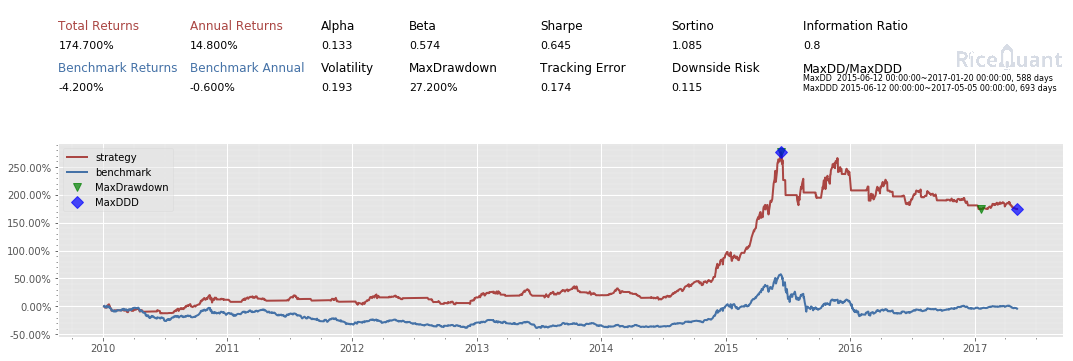

In [7]:
config = {
  "base": {
    "start_date": "2010-01-01",
    "end_date": "2017-05-05",
    "benchmark": "000001.XSHG",
    "accounts": {
        "stock": 100000
    }
  },
  "extra": {
    "log_level": "info",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True,
    },
  }
}


from rqalpha.api import *
from rqalpha import run_func


def init(context):
    context.stocks = ['000300.XSHG', '000905.XSHG', '000012.XSHG']

    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')
    
    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]
    
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)
        
        
results = run_func(init=init, handle_bar=handle_bar, config=config)

In [8]:
report = results["sys_analyser"]

In [9]:
report["trades"][:5]

,commission,exec_id,last_price,last_quantity,order_book_id,order_id,position_effect,side,symbol,tax,trading_datetime,transaction_cost
datetime,,,,,,,,,,,,
2010-01-05 15:00:00,79.922208,15349094850317,122.28,817,000012.XSHG,15349094720585,OPEN,BUY,国债指数,0,2010-01-05 15:00:00,79.922208
2010-01-06 15:00:00,79.948352,15349094850318,122.32,817,000012.XSHG,15349094720586,CLOSE,SELL,国债指数,0,2010-01-06 15:00:00,79.948352
2010-01-06 15:00:00,76.444704,15349094850319,4550.28,21,000905.XSHG,15349094720587,OPEN,BUY,中证500,0,2010-01-06 15:00:00,76.444704
2010-01-07 15:00:00,74.913888,15349094850320,4459.16,21,000905.XSHG,15349094720588,CLOSE,SELL,中证500,0,2010-01-07 15:00:00,74.913888
2010-01-07 15:00:00,78.180552,15349094850321,122.31,799,000012.XSHG,15349094720589,OPEN,BUY,国债指数,0,2010-01-07 15:00:00,78.180552
